## **Breast Cancer Predictor App**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
data = pd.read_csv('breastCancer.csv')

In [3]:
data.head()

,id,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [4]:
data['class'].unique()

array([2, 4], dtype=int64)

In [5]:
data['class'].value_counts()

2    458
4    241
Name: class, dtype: int64

#### **We can change the 2 and 4 to 0 and 1 respectively**

In [7]:
data['class'] = data['class'].replace(2,0)

In [8]:
data['class'] = data['class'].replace(4,1)

In [9]:
data['class'].unique()

array([0, 1], dtype=int64)

In [10]:
data['clump_thickness'].min()

1

In [11]:
data['clump_thickness'].max()

10

## **Exploratory Data Analysis**

In [13]:
data['class'].value_counts()

0    458
1    241
Name: class, dtype: int64

In [14]:
data.dtypes

id                    int64
clump_thickness       int64
size_uniformity       int64
shape_uniformity      int64
marginal_adhesion     int64
epithelial_size       int64
bare_nucleoli        object
bland_chromatin       int64
normal_nucleoli       int64
mitoses               int64
class                 int64
dtype: object

In [15]:
data['bare_nucleoli'].isna().sum()

0

In [16]:
data[data['bare_nucleoli']=='?']

,id,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
23,1057013,8,4,5,1,2,?,7,3,1,1
40,1096800,6,6,6,9,6,?,7,8,1,0
139,1183246,1,1,1,1,1,?,2,1,1,0
145,1184840,1,1,3,1,2,?,2,1,1,0
158,1193683,1,1,2,1,3,?,1,1,1,0
164,1197510,5,1,1,1,2,?,3,1,1,0
235,1241232,3,1,4,1,2,?,3,1,1,0
249,169356,3,1,1,1,2,?,3,1,1,0
275,432809,3,1,3,1,2,?,2,1,1,0
292,563649,8,8,8,1,2,?,6,10,1,1


## **Alternatively**

using the isdigit() function

In [17]:
digits_in_bare_nucleoli = pd.DataFrame(data.bare_nucleoli.str.isdigit())
data[digits_in_bare_nucleoli['bare_nucleoli']==False]

,id,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
23,1057013,8,4,5,1,2,?,7,3,1,1
40,1096800,6,6,6,9,6,?,7,8,1,0
139,1183246,1,1,1,1,1,?,2,1,1,0
145,1184840,1,1,3,1,2,?,2,1,1,0
158,1193683,1,1,2,1,3,?,1,1,1,0
164,1197510,5,1,1,1,2,?,3,1,1,0
235,1241232,3,1,4,1,2,?,3,1,1,0
249,169356,3,1,1,1,2,?,3,1,1,0
275,432809,3,1,3,1,2,?,2,1,1,0
292,563649,8,8,8,1,2,?,6,10,1,1


In [18]:
df = data.replace('?',np.nan)

In [32]:
df.isna().sum()

id                    0
clump_thickness       0
size_uniformity       0
shape_uniformity      0
marginal_adhesion     0
epithelial_size       0
bare_nucleoli        16
bland_chromatin       0
normal_nucleoli       0
mitoses               0
class                 0
dtype: int64

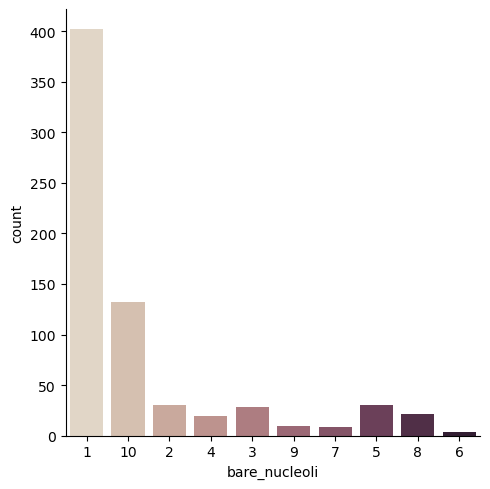

In [20]:
sns.catplot(x='bare_nucleoli',kind='count',palette='ch:.25',data=df)

In [21]:
df.median()

id                   1171710.0
clump_thickness            4.0
size_uniformity            1.0
shape_uniformity           1.0
marginal_adhesion          1.0
epithelial_size            2.0
bare_nucleoli              1.0
bland_chromatin            3.0
normal_nucleoli            1.0
mitoses                    1.0
class                      0.0
dtype: float64

In [33]:
df.fillna(df.median())

,id,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,0
1,1002945,5,4,4,5,7,10,3,2,1,0
2,1015425,3,1,1,1,2,2,3,1,1,0
3,1016277,6,8,8,1,3,4,3,7,1,0
4,1017023,4,1,1,3,2,1,3,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,0
695,841769,2,1,1,1,2,1,1,1,1,0
696,888820,5,10,10,3,7,3,8,10,2,1
697,897471,4,8,6,4,3,4,10,6,1,1


In [28]:
df.dtypes

id                    int64
clump_thickness       int64
size_uniformity       int64
shape_uniformity      int64
marginal_adhesion     int64
epithelial_size       int64
bare_nucleoli        object
bland_chromatin       int64
normal_nucleoli       int64
mitoses               int64
class                 int64
dtype: object

In [34]:
df.isna().sum()

id                    0
clump_thickness       0
size_uniformity       0
shape_uniformity      0
marginal_adhesion     0
epithelial_size       0
bare_nucleoli        16
bland_chromatin       0
normal_nucleoli       0
mitoses               0
class                 0
dtype: int64

In [35]:
median = df['bare_nucleoli'].median()
df['bare_nucleoli'] = df['bare_nucleoli'].fillna(median)


df['bare_nucleoli'] = df['bare_nucleoli'].astype('int64')

In [37]:
df.dtypes

id                   int64
clump_thickness      int64
size_uniformity      int64
shape_uniformity     int64
marginal_adhesion    int64
epithelial_size      int64
bare_nucleoli        int64
bland_chromatin      int64
normal_nucleoli      int64
mitoses              int64
class                int64
dtype: object

In [38]:
df.drop('id',axis=1,inplace=True)

In [39]:
df.head()

,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
0,5,1,1,1,2,1,3,1,1,0
1,5,4,4,5,7,10,3,2,1,0
2,3,1,1,1,2,2,3,1,1,0
3,6,8,8,1,3,4,3,7,1,0
4,4,1,1,3,2,1,3,1,1,0


## **Univariate Data Analysis of the class column**

C:\Users\draut\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='class', ylabel='Density'>

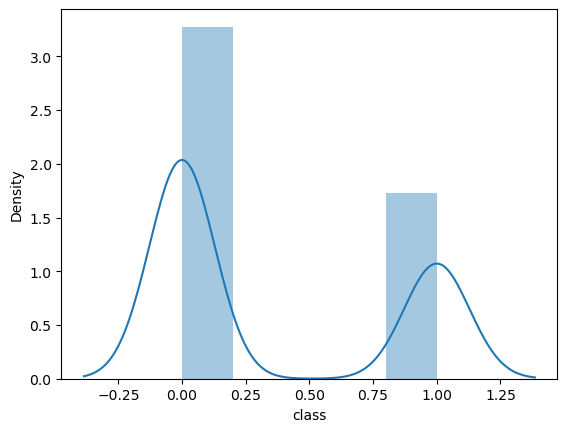

In [40]:
sns.distplot(df['class'])

## **Multivariate Data Analysis**

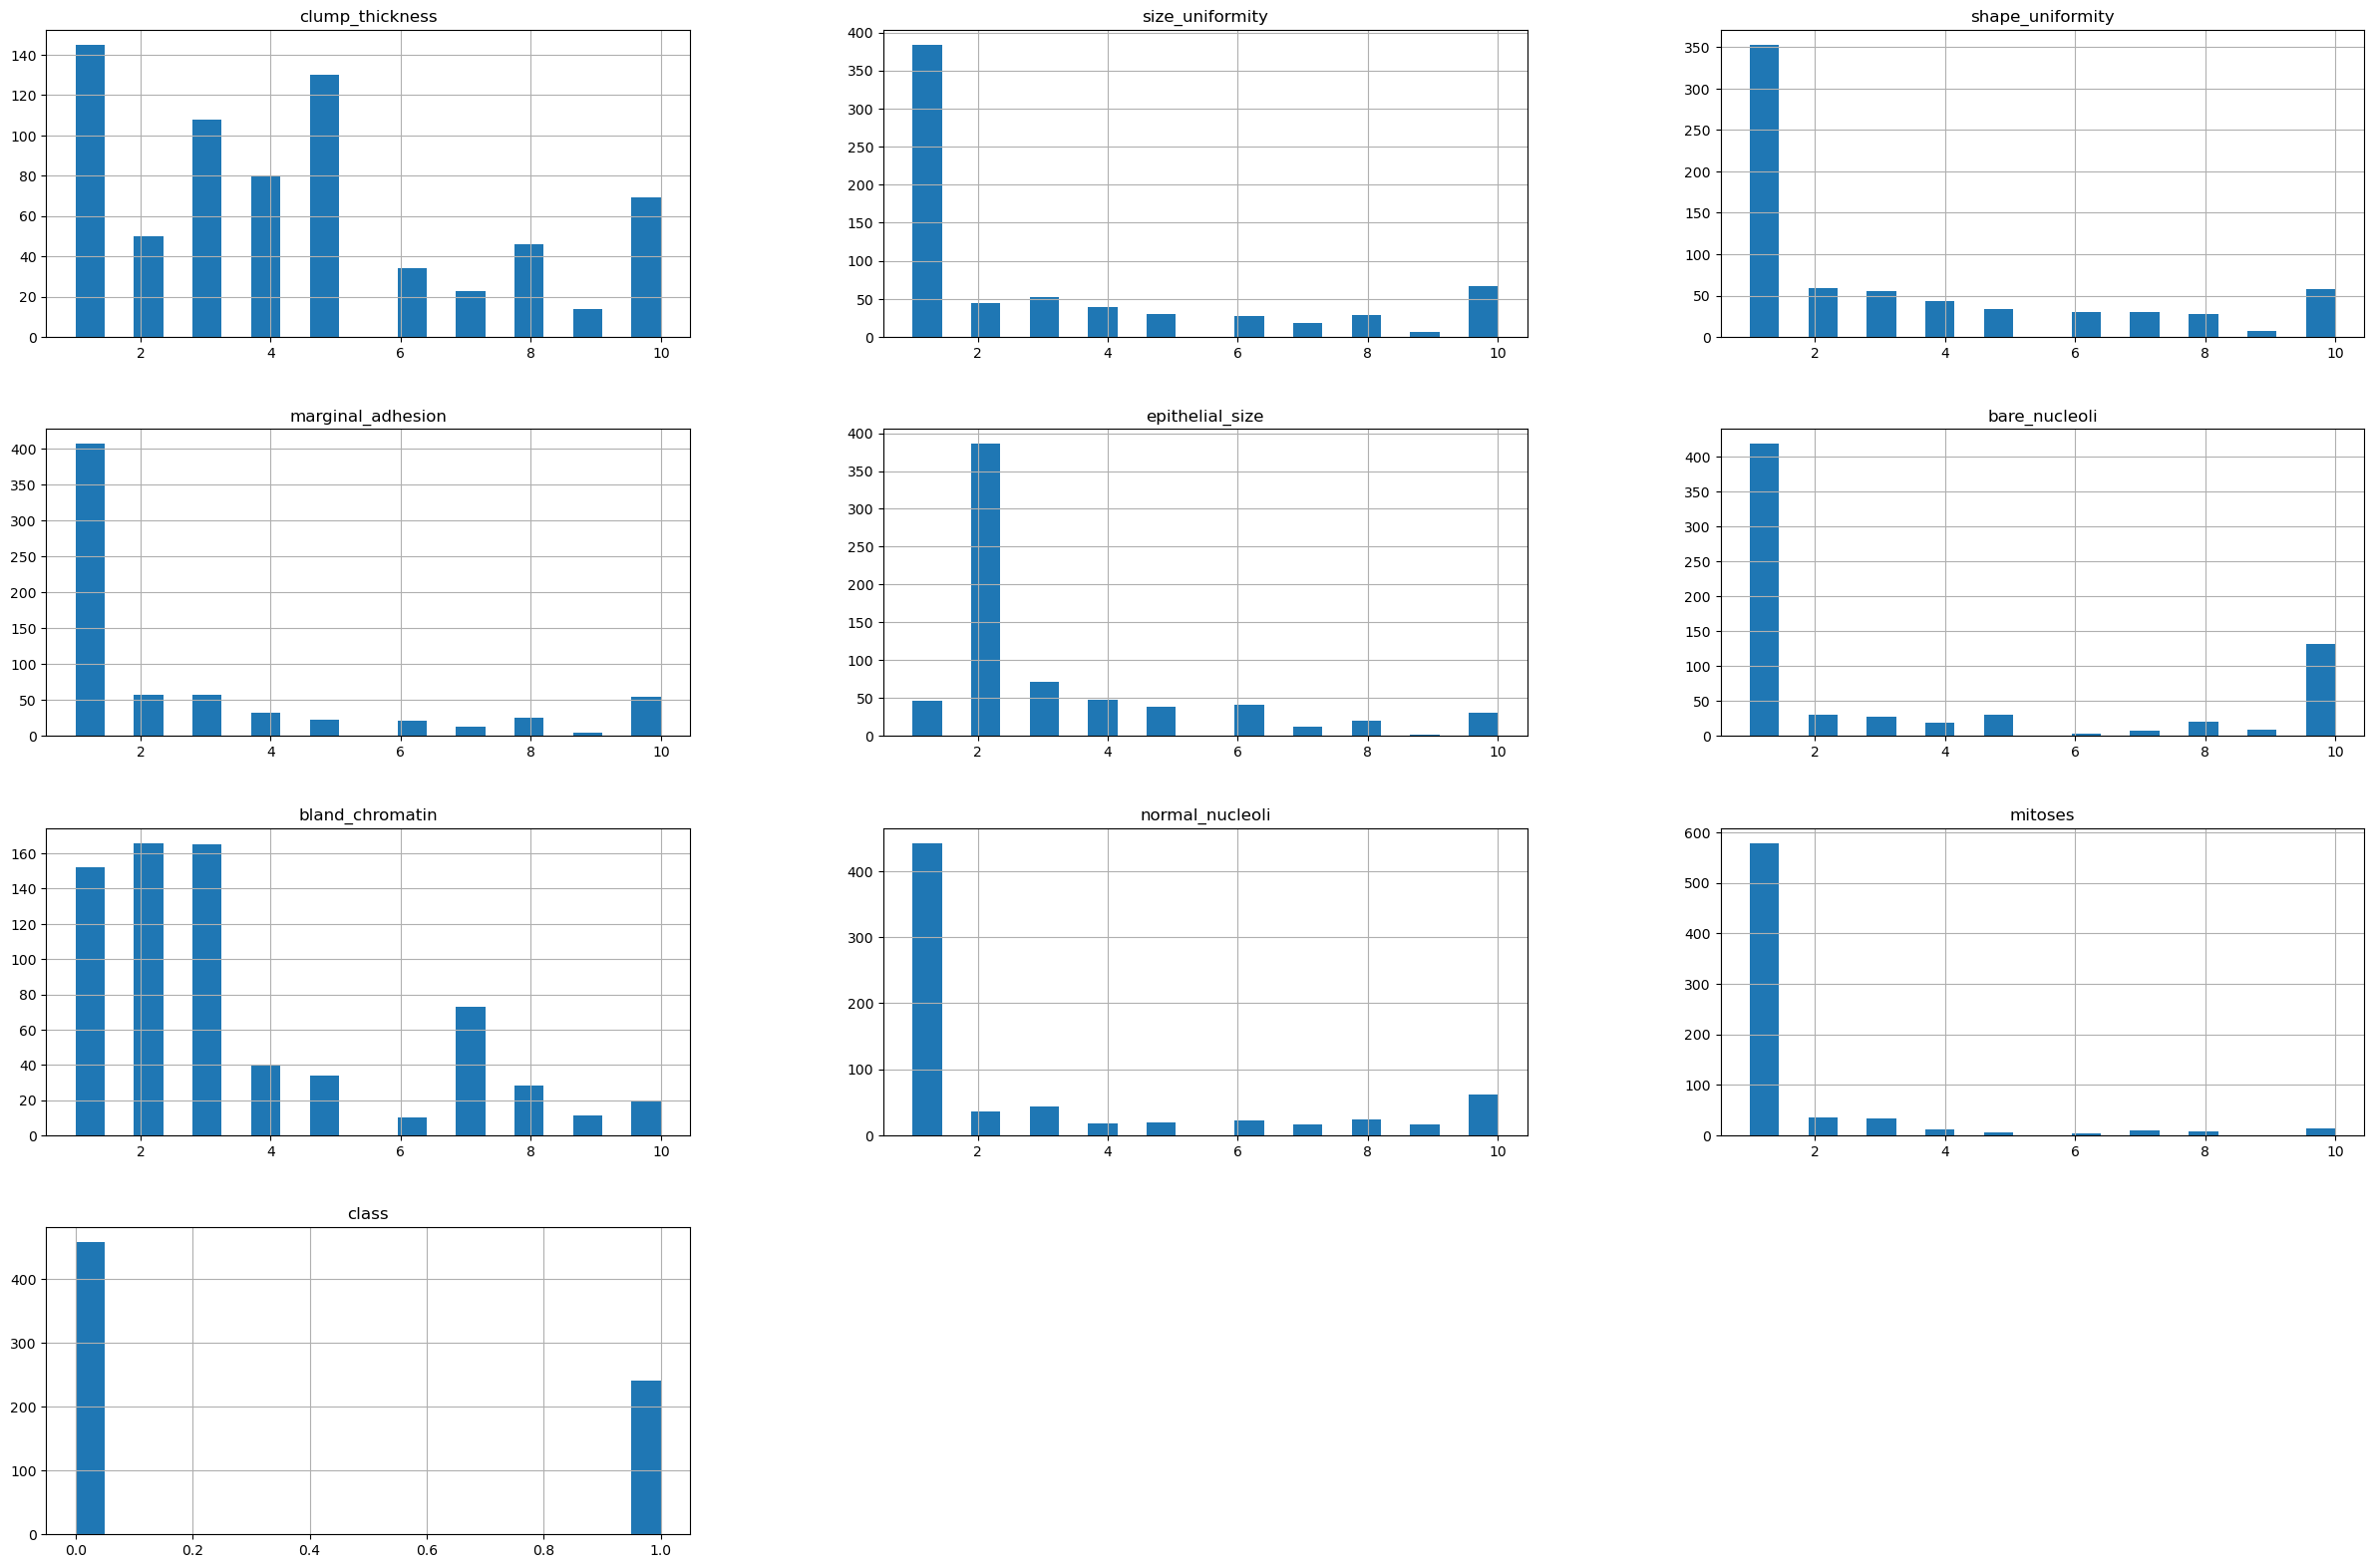

In [42]:
df.hist(bins=20, figsize=(30,30), layout=(6,3));

In [43]:
df.corr()

,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
clump_thickness,1.000000,0.644913,0.654589,0.486356,0.521816,0.590008,0.558428,0.535835,0.350034,0.716001
size_uniformity,0.644913,1.000000,0.906882,0.705582,0.751799,0.686673,0.755721,0.722865,0.458693,0.817904
shape_uniformity,0.654589,0.906882,1.000000,0.683079,0.719668,0.707474,0.735948,0.719446,0.438911,0.818934
marginal_adhesion,0.486356,0.705582,0.683079,1.000000,0.599599,0.666971,0.666715,0.603352,0.417633,0.696800
epithelial_size,0.521816,0.751799,0.719668,0.599599,1.000000,0.583701,0.616102,0.628881,0.479101,0.682785
bare_nucleoli,0.590008,0.686673,0.707474,0.666971,0.583701,1.000000,0.674215,0.574778,0.342397,0.818968
bland_chromatin,0.558428,0.755721,0.735948,0.666715,0.616102,0.674215,1.000000,0.665878,0.344169,0.756616
normal_nucleoli,0.535835,0.722865,0.719446,0.603352,0.628881,0.574778,0.665878,1.000000,0.428336,0.712244
mitoses,0.350034,0.458693,0.438911,0.417633,0.479101,0.342397,0.344169,0.428336,1.000000,0.423170
class,0.716001,0.817904,0.818934,0.696800,0.682785,0.818968,0.756616,0.712244,0.423170,1.000000


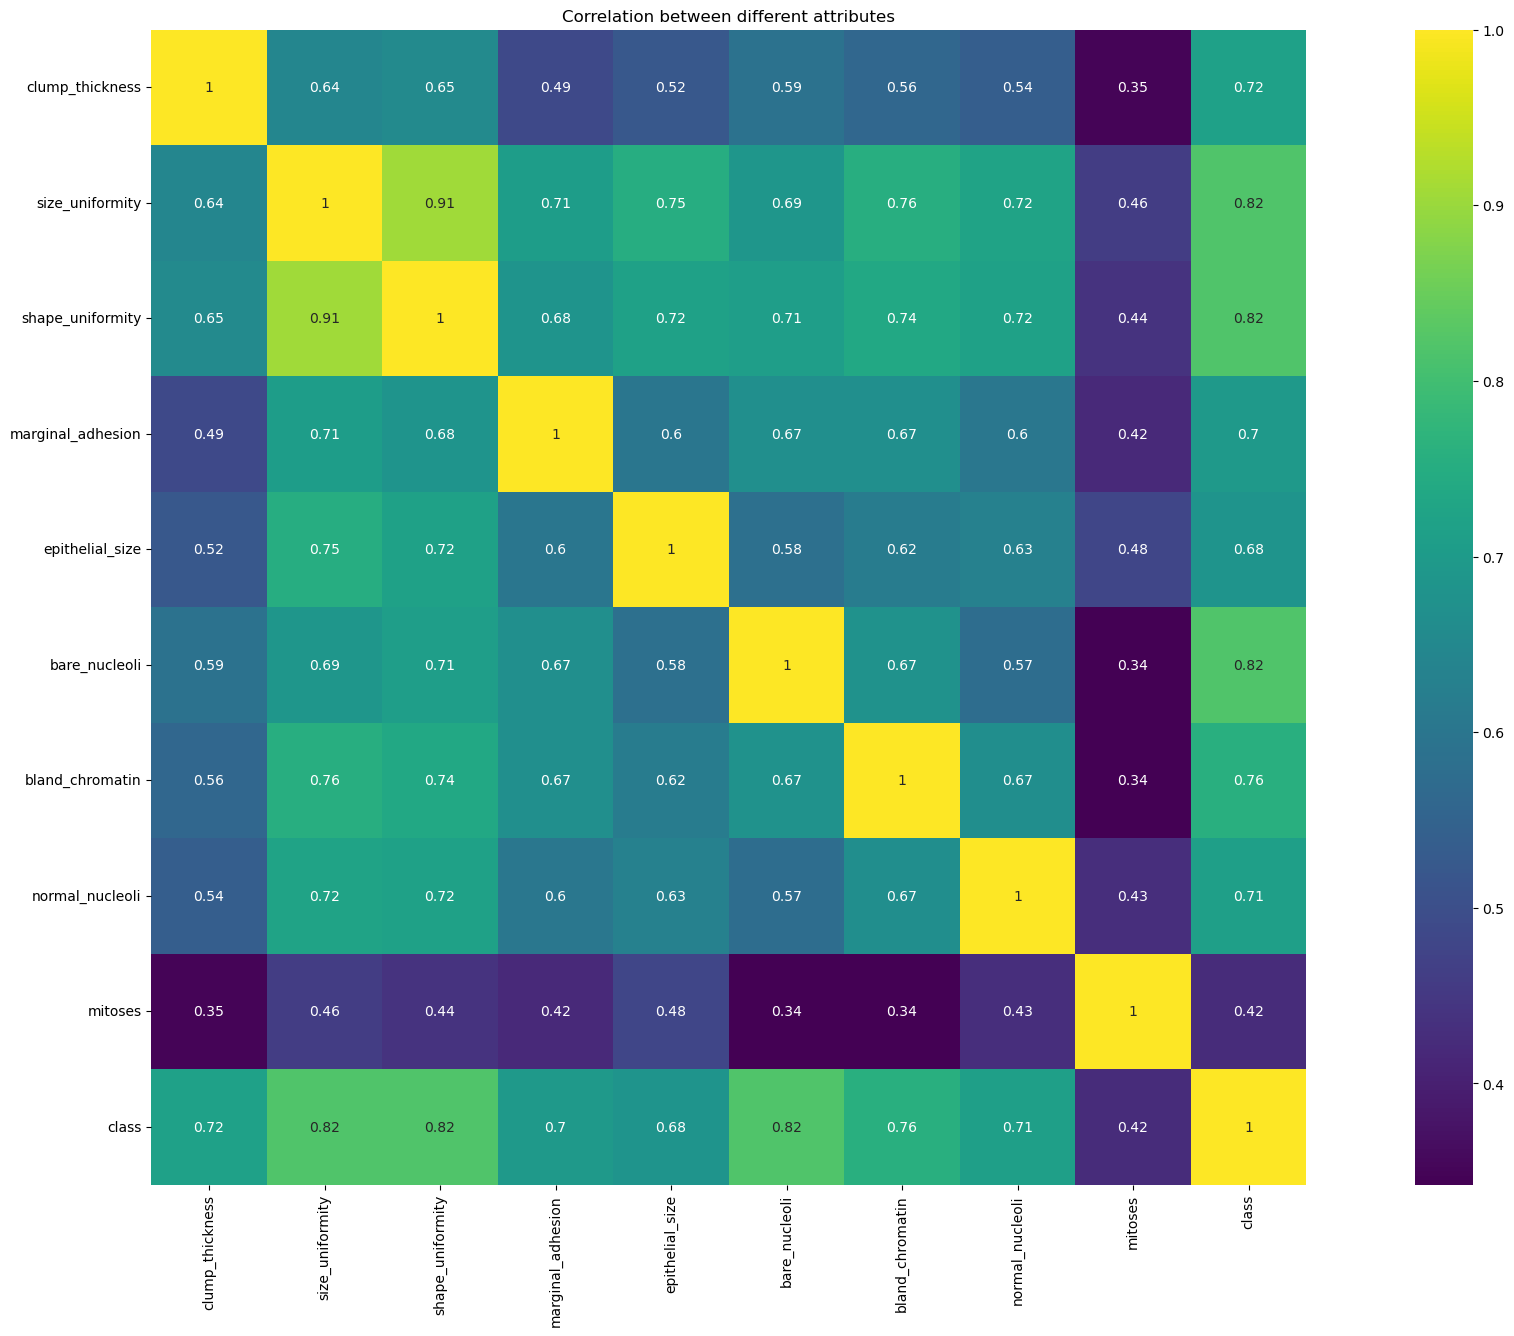

In [44]:
plt.figure(figsize=(28,15))
sns.heatmap(df.corr(), vmax=1, square=True, annot=True, cmap='viridis')
plt.title('Correlation between different attributes')
plt.show()

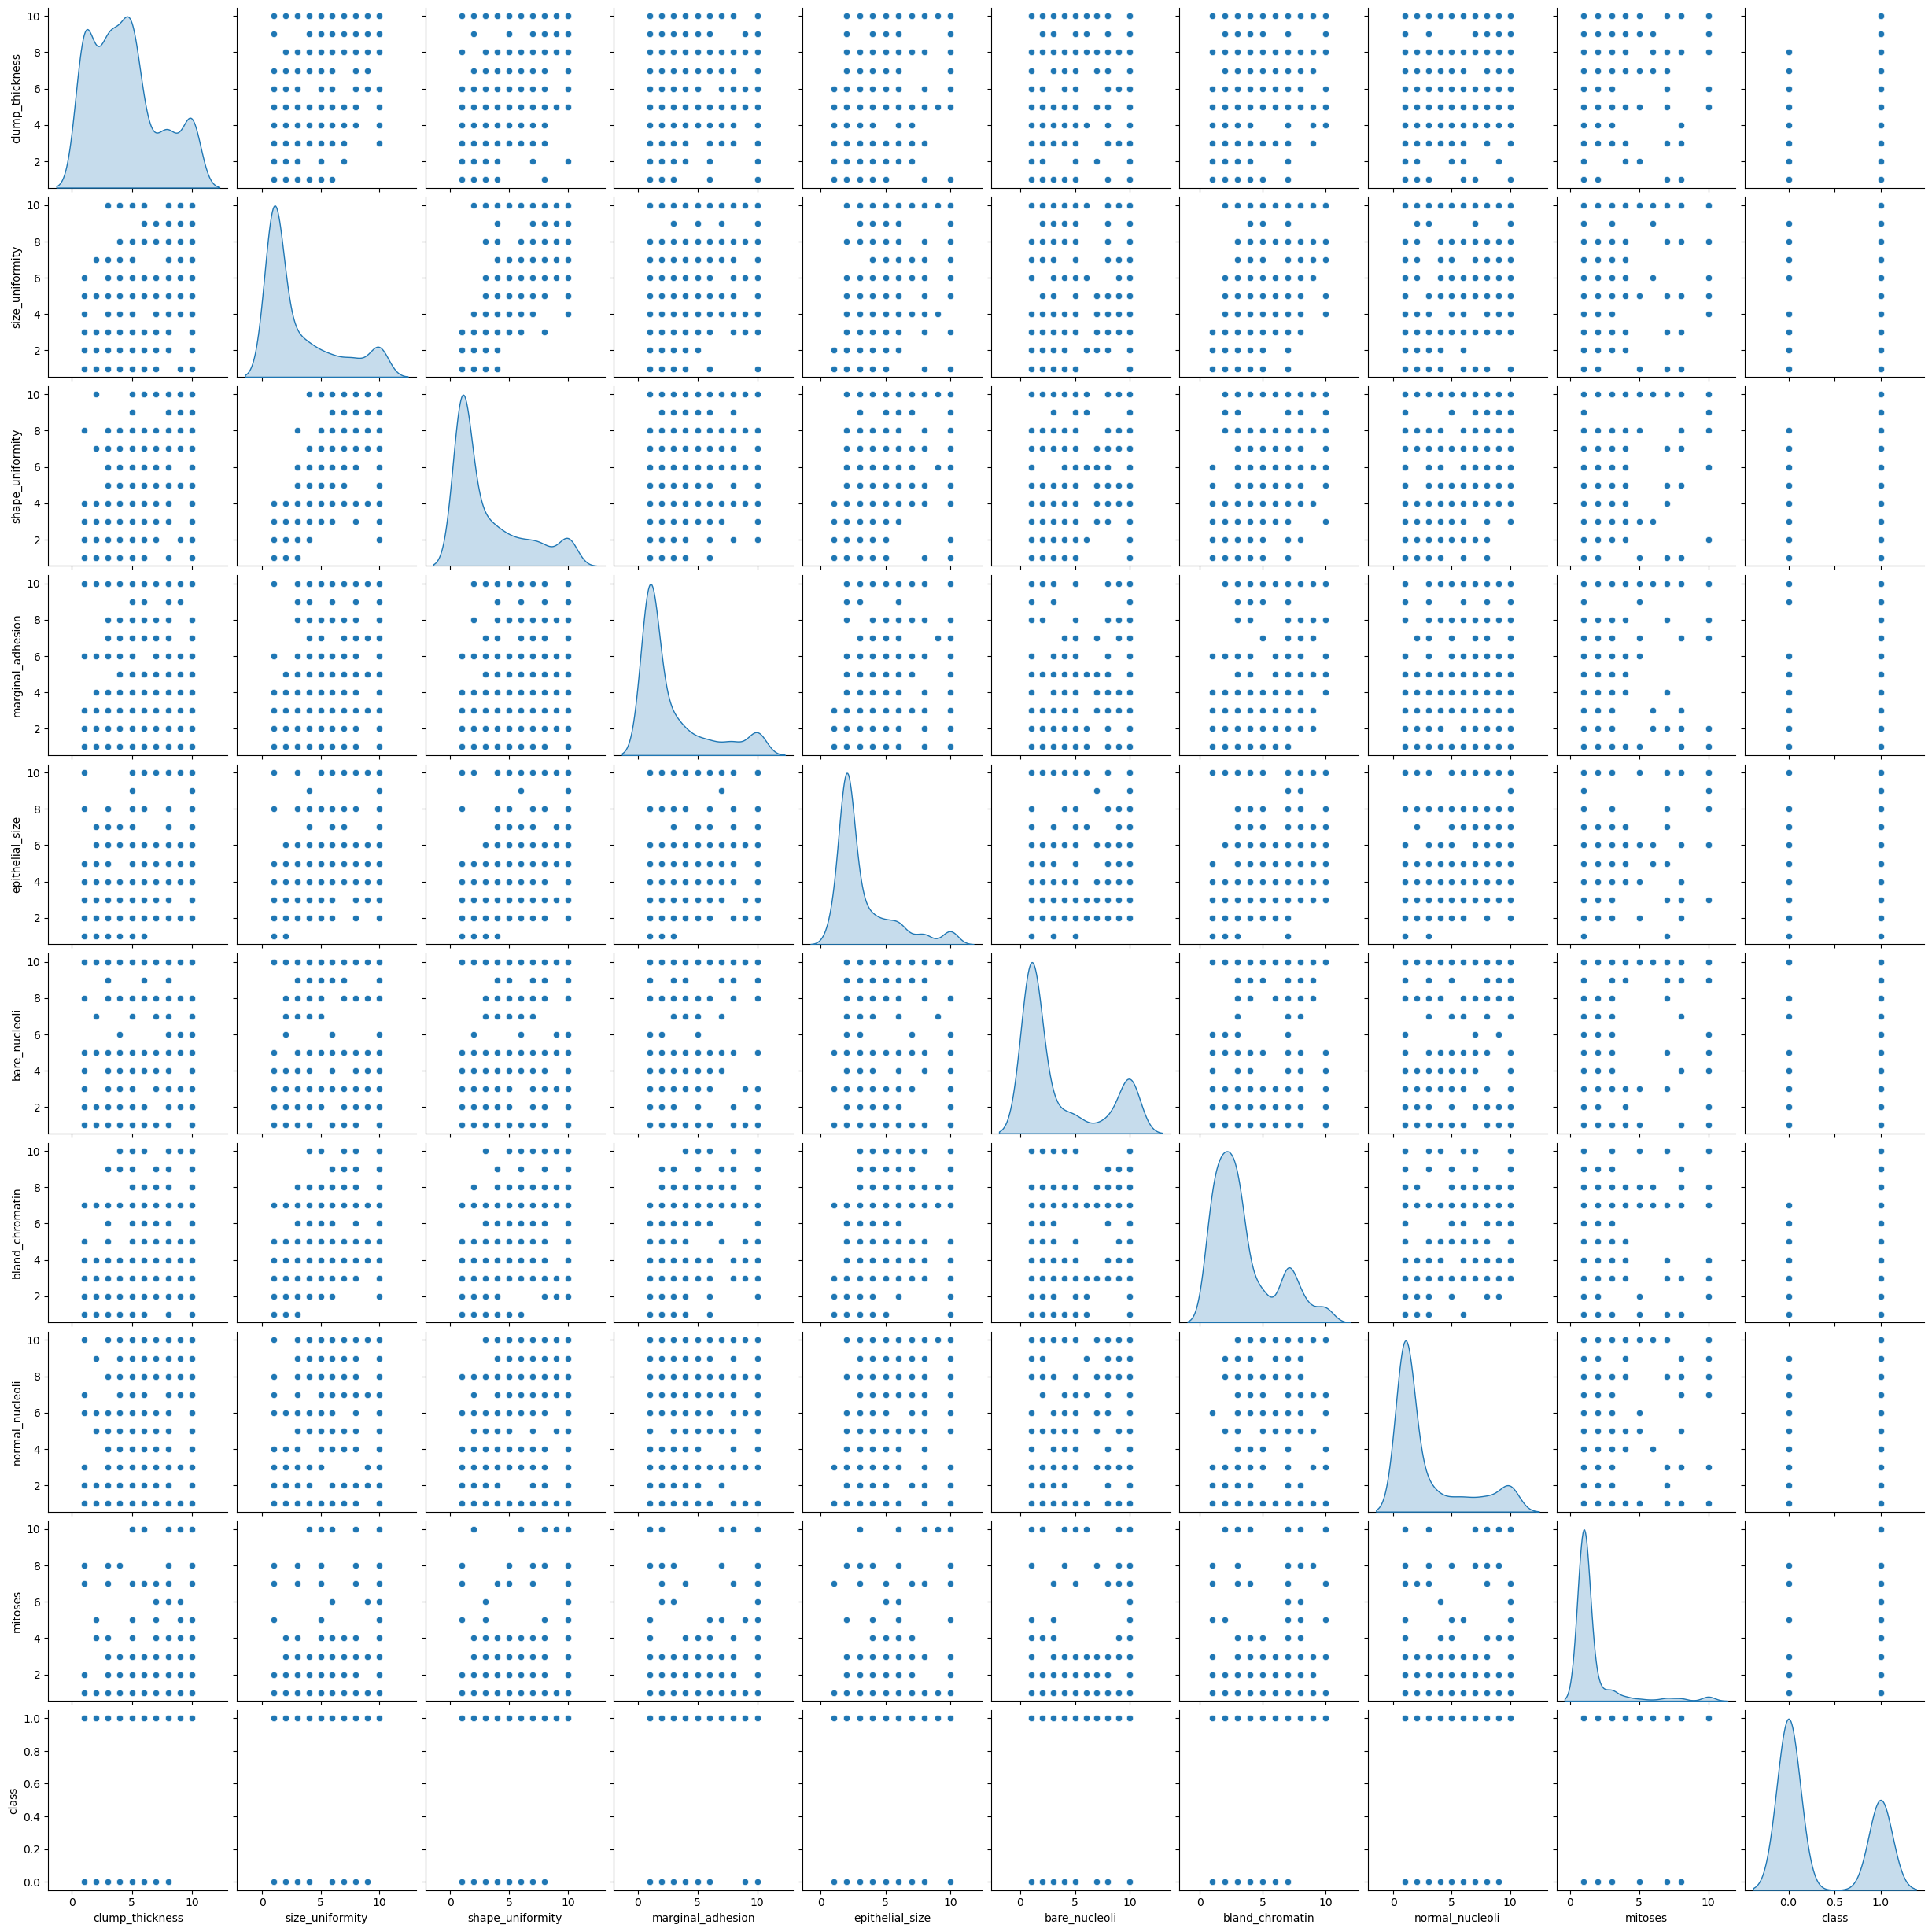

In [45]:
sns.pairplot(df, diag_kind='kde')

## **Building our Model**

In [46]:
X = df.drop('class', axis=1)
y = df['class']

In [47]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=1)

## **KNeighborsClassifier**

In [48]:
from sklearn.neighbors import KNeighborsClassifier

KNN = KNeighborsClassifier(n_neighbors=5, weights='distance')

In [49]:
#Call Nearest Neighbour Algorithm

KNN.fit(X_train, y_train)

KNeighborsClassifier(weights='distance')

In [50]:
X_test

,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses
584,5,1,1,6,3,1,1,1,1
417,1,1,1,1,2,1,2,1,1
606,4,1,1,2,2,1,1,1,1
349,4,2,3,5,3,8,7,6,1
134,3,1,1,1,3,1,2,1,1
...,...,...,...,...,...,...,...,...,...
440,10,4,3,10,4,10,10,1,1
299,9,1,2,6,4,10,7,7,2
577,1,1,1,1,2,1,2,1,1
103,8,2,3,1,6,3,7,1,1


In [51]:
predicted_1 = KNN.predict(X_test)
predicted_1

array([0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0], dtype=int64)

In [52]:
from scipy.stats import zscore
print('KNeighborsClassifier Algorithm is predicting at {0:.2g}%'.format(KNN.score(X_test,y_test)*100))

KNeighborsClassifier Algorithm is predicting at 98%


Confusion Matrix for KNeighbors Classifier


<AxesSubplot:>

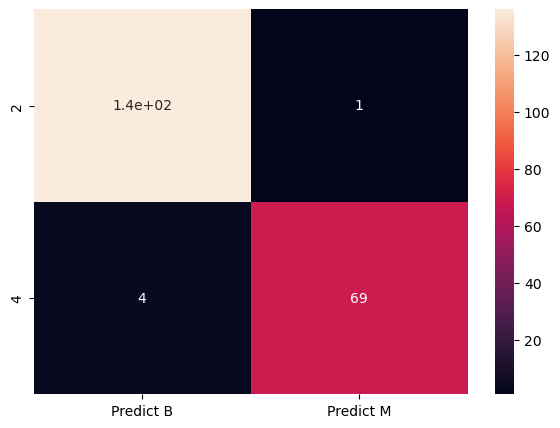

In [59]:
print('Confusion Matrix for KNeighbors Classifier')
cm = metrics.confusion_matrix(y_test, predicted_1)

df_cm = pd.DataFrame(cm, index = [i for i in [2,4]],
                  columns = [i for i in ["Predict B","Predict M"]])

plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

## **Support Vector Machines**

In [60]:
from sklearn.svm import SVC

svc = SVC(gamma=0.025, C=3, kernel='linear')
svc.fit(X_train, y_train)

SVC(C=3, gamma=0.025, kernel='linear')

In [61]:
predicted_2 = svc.predict(X_test)
predicted_2

array([0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0], dtype=int64)

In [62]:
print('SupportVectorClassifier Agorithm is predicting at {0:.2g}%'.format(svc.score(X_test, y_test)*100))

SupportVectorClassifier Agorithm is predicting at 97%


In [63]:
knnPredictions=pd.DataFrame(predicted_1)
svcPredictions=pd.DataFrame(predicted_2)

In [65]:
df1=pd.concat([knnPredictions,svcPredictions],axis=1)

In [66]:
df1.columns=[['knnPredictions','svcPredictions']]

In [67]:
df1

,knnPredictions,svcPredictions
0,0,0
1,0,0
2,0,0
3,1,1
4,0,0
...,...,...
205,1,1
206,1,1
207,0,0
208,0,1


Confusion Matrix for KNeighbors Classifier


<AxesSubplot:>

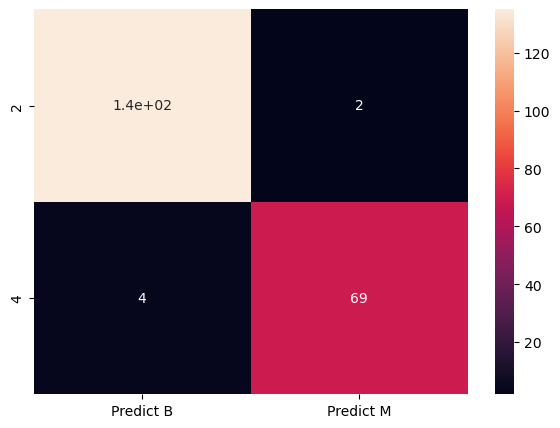

In [70]:
print('Confusion Matrix for KNeighbors Classifier')
cm = metrics.confusion_matrix(y_test, predicted_2)

df_cm = pd.DataFrame(cm, index = [i for i in [2,4]],
                  columns = [i for i in ["Predict B","Predict M"]])

plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

## **Feature Importance**

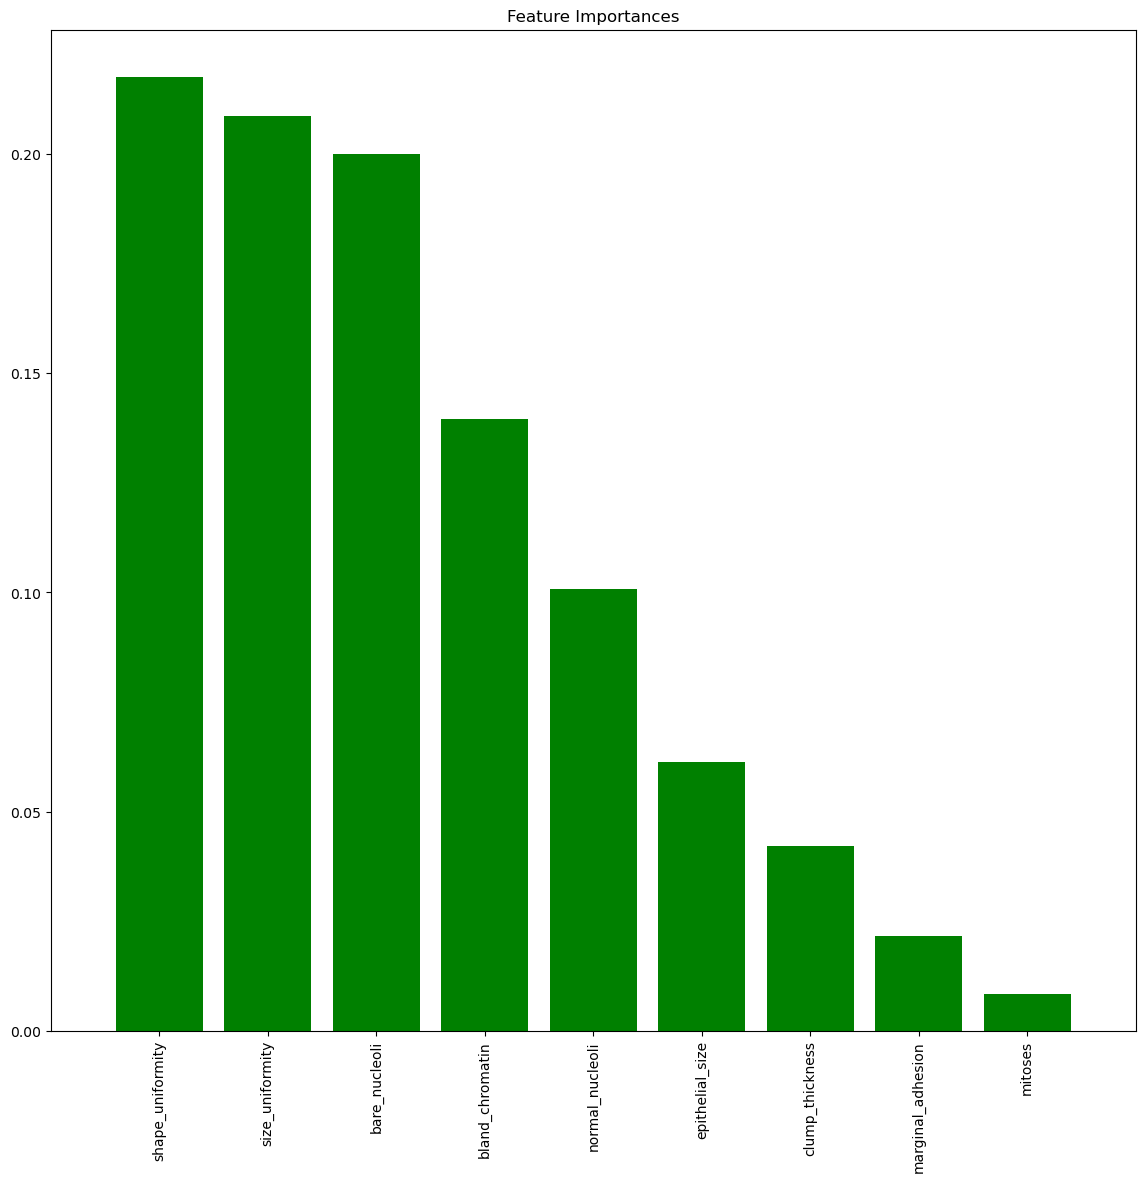

In [71]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf = rf.fit(X_train,y_train)
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

plt.figure(1, figsize=(14,13))
plt.title("Feature Importances")
plt.bar(range(X_train.shape[1]), importances[indices], color='g', align = 'center')
plt.xticks(range(X_train.shape[1]), X_train.columns[indices],rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()

In [72]:
df.head()

,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
0,5,1,1,1,2,1,3,1,1,0
1,5,4,4,5,7,10,3,2,1,0
2,3,1,1,1,2,2,3,1,1,0
3,6,8,8,1,3,4,3,7,1,0
4,4,1,1,3,2,1,3,1,1,0


In [74]:
df.shape

(699, 10)

In [75]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train = scaler.fit_transform(X_train)
x_test = scaler.transform(X_test)

import pickle
pickle.dump(scaler, open('scaler.pkl','wb'))


In [76]:
import pickle

pickle.dump(svc, open('model.pkl','wb'))